# Handling the data

In [1]:
import sys
sys.path.insert(0, '/yunity/arusty/PF-GAP')

#Import libraries, MDS from SKlearn, and all the custom files
import pandas as pd
import matplotlib.pyplot as plt
from Pipeline.functions import *

#Functions
from QGAP.qgap import QGAP
from Redcomets.Redcomets import REDCOMETS
# from RFGAP_Rocket.RFGAP_Rocket import RFGAP_Rocket
# from RDST.rdst import RDST_GAP

In [2]:
static_data = pd.read_csv("/yunity/arusty/PF-GAP/data/sp500_fundamentals_combined.csv")
time_series = pd.read_csv("/yunity/arusty/PF-GAP/data/sp500_daily_returns_since_2022.csv")
stock_data = pd.read_csv("/yunity/arusty/PF-GAP/data/Labeled_11-01-2024_GICS.csv")

static_data.head()

,Ticker,Year,PE Ratio,PB Ratio,PS Ratio,ROE,ROA,Debt/Equity,Current Ratio,Profit Margin,Revenue Growth YoY,EPS Growth Next 5Y,Market Cap
0,MMM,2024,17.295145,16.742617,3.04910,1.086153,0.104670,312.492,1.657,0.169807,-0.010,0.221,74742579200
1,MMM,2023,17.295145,16.742617,3.04910,-1.455170,-0.138296,312.492,1.657,-0.284234,-0.010,0.221,74742579200
2,MMM,2022,17.295145,16.742617,3.04910,0.392406,0.124357,312.492,1.657,0.220825,-0.010,0.221,74742579200
3,AOS,2024,17.988981,5.003449,2.45474,0.283302,0.164691,12.132,1.552,0.139755,-0.077,-0.181,9372443648
4,AOS,2023,17.988981,5.003449,2.45474,0.301778,0.173185,12.132,1.552,0.144466,-0.077,-0.181,9372443648


In [3]:
time_series.head()

,Date,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
0,2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-04,0.014010,0.016633,-0.023518,-0.001920,-0.007146,-0.018374,-0.038738,0.002871,0.032779,...,0.009057,0.013160,-0.040422,-0.003190,0.006329,0.010608,0.005347,0.006337,0.010145,-0.038072
2,2022-01-05,-0.004106,-0.016714,-0.004493,0.005253,-0.017611,-0.071426,-0.057264,-0.045808,-0.001662,...,0.002244,-0.006955,-0.018968,-0.037033,0.009800,-0.013629,-0.012677,-0.050068,-0.003297,-0.038024
3,2022-01-06,-0.008301,0.006703,-0.000148,-0.004711,-0.048290,-0.000603,0.000588,-0.003858,0.018475,...,0.023880,-0.011265,0.009546,0.004629,-0.007822,-0.001373,0.010330,-0.005410,-0.008307,0.003971
4,2022-01-07,0.010955,-0.011296,0.003108,-0.002588,-0.019180,-0.006652,-0.031050,-0.006024,0.015852,...,0.020773,-0.011863,-0.001556,-0.001063,0.008759,-0.007992,-0.011466,-0.043771,-0.006050,-0.029114


In [4]:
# Display rows in time_series that have any missing values
time_series.drop(index=0, inplace=True)
null_columns = time_series.columns[time_series.isnull().any()]
print(null_columns)

Index(['CEG', 'GEHC', 'GEV', 'KVUE', 'SW', 'SOLV', 'VLTO'], dtype='object')


In [5]:
print(time_series.shape)
time_series = time_series.dropna(axis=1)
print(time_series.shape)

(829, 504)
(829, 497)


In [6]:
# For a visual of the time sereies data with corresponding dates
time_series.T

,1,2,3,4,5,6,7,8,9,10,...,820,821,822,823,824,825,826,827,828,829
Date,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14,2022-01-18,...,2025-04-10,2025-04-11,2025-04-14,2025-04-15,2025-04-16,2025-04-17,2025-04-21,2025-04-22,2025-04-23,2025-04-24
MMM,0.01401,-0.004106,-0.008301,0.010955,-0.014115,0.00885,0.002458,0.008917,-0.012595,-0.002574,...,-0.038678,0.022411,0.000441,-0.005514,-0.035487,-0.001916,-0.031641,0.081212,-0.001981,0.020726
AOS,0.016633,-0.016714,0.006703,-0.011296,-0.003127,0.009772,0.003345,-0.012384,-0.028575,0.001117,...,0.004955,0.025927,0.010853,-0.020705,-0.015505,0.004454,-0.022648,0.036461,-0.002345,0.023351
ABT,-0.023518,-0.004493,-0.000148,0.003108,-0.002213,0.003253,-0.014591,-0.027017,-0.011492,-0.012406,...,-0.019994,0.019116,0.008512,-0.009029,0.027571,0.009869,-0.008322,0.014166,-0.014348,-0.003543
ABBV,-0.00192,0.005253,-0.004711,-0.002588,0.011195,0.004252,0.002336,-0.017368,0.0176,0.006698,...,-0.031361,0.004879,0.023136,-0.003719,-0.028959,0.007631,-0.016359,0.021274,0.018817,0.018752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.010608,-0.013629,-0.001373,-0.007992,-0.010136,0.016891,-0.000086,-0.015149,-0.02517,-0.013986,...,-0.02552,0.012816,0.005868,-0.005105,0.000458,0.011265,-0.017207,0.029303,0.014772,0.019938
YUM,0.005347,-0.012677,0.01033,-0.011466,-0.013964,-0.02098,-0.011557,-0.002633,-0.013586,-0.005352,...,0.000344,-0.003436,0.006897,-0.008973,-0.014652,0.00519,-0.019538,0.032311,0.007653,0.009715
ZBRA,0.006337,-0.050068,-0.00541,-0.043771,0.008571,0.005902,-0.000241,-0.023475,0.004184,-0.021364,...,-0.083685,0.009267,0.028078,-0.015792,-0.014686,0.008765,-0.020641,0.023193,0.032042,0.040942
ZBH,0.010145,-0.003297,-0.008307,-0.00605,-0.009754,0.011663,-0.02181,0.019828,-0.005388,-0.008086,...,-0.011408,0.00088,-0.003713,-0.046092,-0.003393,0.010109,-0.017872,0.013206,0.020628,0.020613


In [7]:
# Convert 'Date' column to datetime
time_series['Date'] = pd.to_datetime(time_series['Date'])

# Filter for dates before 2024
time_series_before_2024 = time_series[time_series['Date'] < '2024-01-01'].copy()

# Filter for dates in 2024 only
time_series_2024 = time_series[(time_series['Date'] >= '2024-01-01') & (time_series['Date'] < '2025-01-01')].copy()

In [8]:
time_series_2024

,Date,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
501,2024-01-02,0.006220,-0.012130,-0.001999,0.031296,-0.011371,-0.027707,-0.059901,0.004675,0.009454,...,0.019810,-0.005182,-0.028182,0.038305,0.025198,-0.006034,-0.012475,-0.019573,-0.002547,-0.004053
502,2024-01-03,-0.020091,-0.033522,-0.003004,0.004005,-0.025943,-0.014274,-0.023524,-0.021200,-0.001081,...,0.022241,0.002834,0.000485,-0.006025,0.001733,-0.018563,0.000543,-0.057691,-0.007579,-0.018518
503,2024-01-04,0.003525,0.008512,0.013331,0.006232,-0.002456,-0.008290,0.005099,-0.003170,-0.010698,...,-0.013495,-0.004738,-0.004955,0.001914,0.002359,0.006902,-0.003176,0.001782,-0.002241,0.005753
504,2024-01-05,0.003883,-0.004283,-0.001622,0.004211,-0.001394,-0.004321,0.018896,-0.003710,0.005103,...,-0.007538,-0.002589,-0.004793,0.015285,0.000000,-0.001602,-0.002720,-0.001107,-0.001830,0.004174
505,2024-01-08,0.002486,0.002910,0.014440,-0.004379,0.011081,0.028250,0.054842,0.014362,0.001813,...,0.002813,0.013815,0.026862,0.014637,-0.002354,0.006242,0.002338,0.033242,0.016586,0.006672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2024-12-24,0.010699,0.004813,0.003937,0.009025,0.007972,0.002686,0.013563,-0.003063,0.004867,...,0.010176,0.005248,0.013753,0.007604,0.007236,0.005446,0.008516,0.012262,0.004494,0.002557
749,2024-12-26,0.006290,0.000000,0.004444,-0.004444,-0.003318,0.004956,-0.009740,-0.013825,0.004068,...,-0.011722,0.005822,0.001264,0.005970,-0.000440,0.002708,0.007407,0.003566,-0.000466,0.004979
750,2024-12-27,-0.007623,-0.006677,-0.002429,-0.006641,-0.011792,-0.008175,0.001040,-0.007009,-0.002701,...,-0.000371,-0.004908,-0.011656,-0.007054,-0.000587,-0.007935,-0.005662,-0.019604,-0.003543,-0.005558
751,2024-12-30,-0.008066,-0.005992,-0.019045,-0.010168,-0.010360,-0.001523,-0.021967,-0.007843,-0.003966,...,0.004079,-0.009706,-0.015925,-0.032138,-0.008072,-0.010636,-0.012645,-0.013417,-0.011535,-0.014338


In [9]:
# drop row with index 0 and reset index
time_series_before_2024 = time_series_before_2024.drop(columns = ["Date"]).T
time_series_2024 = time_series_2024.drop(columns = ["Date"]).T

# show the first few rows
time_series_2024.head()

,501,502,503,504,505,506,507,508,509,510,...,743,744,745,746,747,748,749,750,751,752
MMM,0.006220,-0.020091,0.003525,0.003883,0.002486,0.002205,-0.007333,0.005725,-0.007345,-0.004439,...,-0.010968,-0.019680,0.012746,0.016912,-0.002321,0.010699,0.006290,-0.007623,-0.008066,-0.000310
AOS,-0.012130,-0.033522,0.008512,-0.004283,0.002910,0.007191,0.008016,0.002237,0.005579,-0.001603,...,-0.015023,-0.026832,-0.006821,0.004091,-0.002328,0.004813,0.000000,-0.006677,-0.005992,0.002793
ABT,-0.001999,-0.003004,0.013331,-0.001622,0.014440,0.002936,0.014814,-0.003074,0.003700,-0.001405,...,0.005949,-0.012005,0.004378,0.016100,0.000700,0.003937,0.004444,-0.002429,-0.019045,0.002748
ABBV,0.031296,0.004005,0.006232,0.004211,-0.004379,0.005451,0.015895,-0.006732,0.001048,-0.005665,...,0.021849,-0.013456,-0.008670,0.023671,0.016004,0.009025,-0.004444,-0.006641,-0.010168,0.008513
ACN,-0.011371,-0.025943,-0.002456,-0.001394,0.011081,0.007052,0.007527,0.007645,0.024025,-0.004967,...,0.000672,-0.027120,0.070625,-0.015558,-0.020744,0.007972,-0.003318,-0.011792,-0.010360,-0.001986


In [10]:
time_series_before_2024.head()

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
MMM,0.014010,-0.004106,-0.008301,0.010955,-0.014115,0.008850,0.002458,0.008917,-0.012595,-0.002574,...,-0.000561,-0.010376,0.003589,-0.024282,0.018231,0.007294,0.016740,0.005828,0.008736,-0.003373
AOS,0.016633,-0.016714,0.006703,-0.011296,-0.003127,0.009772,0.003345,-0.012384,-0.028575,0.001117,...,-0.017248,0.002399,0.019020,-0.008282,0.016577,0.002084,0.001468,0.003787,0.000974,0.002432
ABT,-0.023518,-0.004493,-0.000148,0.003108,-0.002213,0.003253,-0.014591,-0.027017,-0.011492,-0.012406,...,-0.012063,0.007177,0.003332,-0.009408,0.010056,0.005070,0.001834,0.005127,0.005556,-0.002989
ABBV,-0.001920,0.005253,-0.004711,-0.002588,0.011195,0.004252,0.002336,-0.017368,0.017600,0.006698,...,-0.005423,-0.004025,0.001173,-0.012435,0.005933,0.015401,-0.002065,0.001682,-0.000839,0.001422
ACN,-0.007146,-0.017611,-0.048290,-0.019180,0.006069,0.005657,0.008152,-0.041942,-0.022166,-0.014376,...,0.004143,-0.006683,-0.000994,-0.005886,0.027246,0.016344,-0.002878,0.001103,-0.006303,-0.001934


In [11]:
# align sectors from stock_data to time_series rows and build labels list
# ensure there’s no leading/trailing whitespace in column names
stock_data.columns = stock_data.columns.str.strip()

sector_map = stock_data.set_index("Symbol")["Labels"]
labels = sector_map.reindex(time_series_before_2024.index).tolist()
labels[:5]

[6.0, 6.0, 5.0, 5.0, 9.0]

In [12]:
print(stock_data[['Sector', 'Labels']].drop_duplicates().sort_values(by='Labels'))

                    Sector  Labels
3   Communication Services       0
5   Consumer Discretionary       1
11        Consumer Staples       2
15                  Energy       3
7               Financials       4
10              Healthcare       5
46             Industrials       6
33               Materials       7
97             Real Estate       8
0               Technology       9
59               Utilities      10


In [13]:
sector_map

Symbol
AAPL     9
NVDA     9
MSFT     9
GOOG     0
GOOGL    0
        ..
BWA      1
HII      6
PARA     0
QRVO     9
BBWI     1
Name: Labels, Length: 503, dtype: int64

In [14]:
labels =  pd.Categorical(labels).codes
np.unique(labels), len(labels) # NOTE: -1 is for missing values

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int8), 496)

In [15]:
missing_label_indices = np.where(labels == -1)[0]
print(missing_label_indices)

[ 38 150 181 283 436 440 485 488]


In [16]:
# CORRECT LABELS HERE THAT HAVE THE MISSING SECTORS
if not labels.flags.writeable:
	labels = labels.copy()
labels[missing_label_indices] = [4, 0, 3, 6, 3, 0, 1, 9]

In [17]:
len(labels), time_series_before_2024.shape

(496, (496, 500))

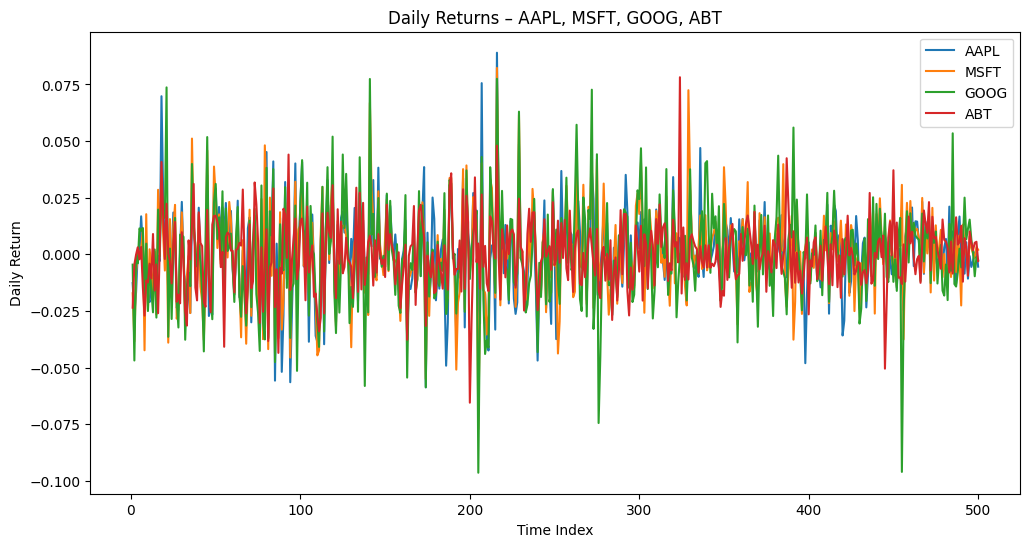

In [18]:
def plot_ticker_returns(tickers):
    # allow a single ticker string as input
    if isinstance(tickers, str):
        tickers = [tickers]
    # select the rows and transpose so time is on the x‐axis
    data = time_series_before_2024.loc[tickers].T
    data.columns = tickers
    data.plot(figsize=(12, 6))
    plt.xlabel('Time Index')
    plt.ylabel('Daily Return')
    plt.title(f"Daily Returns – {', '.join(tickers)}")
    plt.legend()
    plt.show()

# example usage
plot_ticker_returns(['AAPL', 'MSFT', 'GOOG', 'ABT'])


In [19]:
# Split static_data into separate DataFrames by year and align to time_series.index
for year in static_data['Year'].unique():
    # slice out this year's data
    df = static_data[static_data['Year'] == year].reset_index(drop=True)
    # reindex by ticker to match time_series rows
    df = df.set_index('Ticker').reindex(time_series_before_2024.index).reset_index().drop(columns=['index', "Year"])

    # MEDIAN IMPUTATION... May change (but we have small amount of missing data )
    if df.isnull().values.any():
        df = df.fillna(df.median(numeric_only=True))

    globals()[f"static{year}"] = df
    df.to_csv(f"../../data/static{year}.csv", index=False)  # Save as CSV
    print(f"static{year} aligned with time_series, shape {df.shape}, saved as static{year}.csv")

static2024 aligned with time_series, shape (496, 11), saved as static2024.csv
static2023 aligned with time_series, shape (496, 11), saved as static2023.csv
static2022 aligned with time_series, shape (496, 11), saved as static2022.csv
static2025 aligned with time_series, shape (496, 11), saved as static2025.csv


In [ ]:
# #& Save the labels and timeseries as dataframes
# labels_df = pd.DataFrame(labels, columns=['Labels'])
# labels_df.to_csv("../../data/labels.csv", index=False)  # Save as CSV
# time_series_df = pd.DataFrame(time_series_before_2024)
# time_series_df.to_csv("../../data/time_series.csv", index=False)  # Save as CSV"""

# time_series_test = pd.DataFrame(time_series_2024)
# time_series_test.to_csv("../../data/time_series_2024.csv", index=False)  # Save as CSV"""

# # Save the ticker labels to a CSV file
# ticker_labels = time_series.index
# ticker_labels_df = pd.DataFrame(ticker_labels, columns=['Ticker'])
# ticker_labels_df.to_csv('../../data/ticker_labels.csv', index=False)

In [21]:
USE_HOURLY_DATA = False

if USE_HOURLY_DATA:
    time_series = pd.read_csv("/yunity/arusty/PF-GAP/data/HourlyReturnsSingleYear.csv")
    #time_series = pd.read_csv("/yunity/arusty/PF-GAP/data/Hourly_Returns_2024-10(Labels-included).csv")
    labels = time_series.pop("Sector").values
    tickers = time_series.pop("Ticker").values

    
    # slice out this year's data
    df = static_data[static_data['Year'] == 2024].reset_index(drop=True)
    # reindex by ticker to match time_series rows
    df = df.set_index('Ticker').reindex(tickers).reset_index().drop(columns=["Ticker", "Year"])

    # MEDIAN IMPUTATION... May change (but we have small amount of missing data )
    if df.isnull().values.any():
        df = df.fillna(df.median(numeric_only=True))

    globals()[f"static2024"] = df

# Creating the Proximities

In [39]:
time_series_before_2024.shape, static2024.shape

((496, 500), (496, 11))

In [40]:
from QGAP.qgap import QGAP
qgap = QGAP(matrix_type="dense", interval_depth = 8, quantile_divisor = 8)
quant_prox = data_to_proximities(qgap, time_series_before_2024, labels, None, static2023)

In [42]:
qgap._estimator.oob_score_ # 0.6063618290258449 

#& Scores
#* Before 2024: 0.6048387096774194
#* Before 2024 optimized: 0.6955645161290323
#! Before 2024 optimized with static: 0.7056451612903226


#* Without static score on Monthly: 0.5625
#* With Static Score on Monthly: 0.592741935483871


#* Hourly for one Month: 0.5489021956087824
#* Hourly for on Year: 0.5511022044088176



0.7056451612903226

In [26]:
redcomets = REDCOMETS(variant = 3, perc_length = 0.7, n_trees = 100,  static = np.array(static2023)) #static = XSTATIC
redcomets_prox = data_to_proximities(redcomets, time_series_before_2024, labels, None, None, None)

In [ ]:
redcomets.get_ensemble_oob_score() #

#&Scores
#* Before 2024: 0.8398273321745027
#? Before 2024 optimized: 0.859341519963029
#! Before 2024 optimized without static: 0.8707893055519568


#* Without static score on Monthly: 0.8133120172814166
#* With Static Score on Monthly: 0.80160842194521

#* Hourly for one Month: 0.805489573612338
#* Hourly for one Year: 0.8012630561662024

np.float64(0.8707893055519568)

In [32]:
# Rocket
from RFGAP_Rocket.RFGAP_Rocket import RFGAP_Rocket

rf_rocket = RFGAP_Rocket(prediction_type = "classification", rocket = "Multi",
                         n_kernels=256) # Rocket Kwargs
rocket_prox = data_to_proximities(rf_rocket, time_series_before_2024, labels, None, static2023 , None)


In [ ]:
rf_rocket.rf_gap.oob_score_

#&Scores
#* Before 2024: 0.5221774193548387
#? Before 2024 optimized: 0.5383064516129032
#! Before 2024 optimized with static: 0.5443548387096774

#? Without static score on Monthly: 0.4838709677419355
#* With Static Score on Monthly: .45161290322580644

#* Hourly for one Month: 0.4291417165668663
#* Hourly for one Year: 0.44288577154308617

0.5443548387096774

In [39]:
# # RDST
from RDST.rdst import RDST_GAP
rdst = RDST_GAP(save_transformed_data = True, max_shapelets = 10000, 
                shapelet_lengths = None, alpha_similarity = 0.3)
rdst_prox = data_to_proximities(rdst, time_series_before_2024, labels, None, static2023 , None)

# rdst_prox = np.load("rdst_prox.npy")


In [ ]:
rdst._estimator.oob_score_ 

#&Scores
#! Before 2024: 0.6209677419354839
#* Before 2024 optimized: 0.6008064516129032
#? Before 2024 optimized with static: 0.6129032258064516

#* Without static score on Monthly: 0.5504032258064516
#? With Static Score on Monthly: 0.5564516129032258

#* Hourly for one Month: 0.5249500998003992
#* Hourly for one Year: 0.501002004008016

0.6129032258064516

In [28]:
time_series.shape

(496, 829)

In [41]:
# This requires a channel dimension
time_series_reshaped = np.expand_dims(time_series_before_2024.values, axis=1)

# Fresh Prince Tests
from FreshPrince.FreshPrince import FreshPRINCE_GAP
fresh_prince = FreshPRINCE_GAP(default_fc_parameters="minimal", n_estimators=200)
fresh_prince_prox = data_to_proximities(fresh_prince, time_series_reshaped, labels, None, static2023 , None)

In [ ]:
#NOTE: THIS TAKES FOREVER
sys.path.insert(0, '/yunity/arusty/PF-GAP/PFGAP')
from PFGAP.PyPFGAP import PyPFGAP
pf = PyPFGAP()
pf_prox = data_to_proximities(pf, time_series_before_2024, labels.astype(str), None, None, None)

# Read in the file that took nearly 1.5 hours to run
#pf_prox = np.load("/yunity/arusty/PF-GAP/data/prox_files/pf_prox.npy")

In [ ]:
rocket_prox.shape, redcomets_prox.shape, quant_prox.shape, rdst_prox.shape

((501, 501), (501, 501), (501, 501), (501, 501))

In [42]:
#& Save the data

import os

if USE_HOURLY_DATA:
    prox_dir = "../../data/prox_files_hourly"
else:
    prox_dir = "../../data/prox_files_daily"
    
os.makedirs(prox_dir, exist_ok=True)

#np.save(os.path.join(prox_dir, "quant_prox.npy"), quant_prox)
np.save(os.path.join(prox_dir, "redcomets_prox.npy"), redcomets_prox)
np.save(os.path.join(prox_dir, "rocket_prox.npy"), rocket_prox)
np.save(os.path.join(prox_dir, "rdst_prox.npy"), rdst_prox)
np.save(os.path.join(prox_dir, "fresh_prince_prox.npy"), fresh_prince_prox)
#np.save(os.path.join(prox_dir, "pf_prox.npy"), pf_prox)

# Clustering the data

In [ ]:
from sklearn.manifold import MDS
# Initialize MDS
def build_mds(prox):
    """
    TODO: Also check the label ordering is being preserved
    1. TODO
    - Try different parametres
    - Normalize (Min/Max) across the each row
    - Still apply the symmetric, and then then 1 - symmetric
    2. Try PHATE
    """
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    symetric = (prox + prox.T) / 2
    mds_prox = mds.fit_transform((1 - symetric)**2)
    return mds_prox

# Build MDS for each method
mds_quant = build_mds(quant_prox)
mds_redcomets = build_mds( redcomets_prox)
mds_rocket = build_mds(rocket_prox)
mds_rdst = build_mds(rdst_prox)
mds_pf = build_mds(pf_prox)


In [ ]:
np.unique(labels), len(labels) # NOTE: -1 is for missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 501)

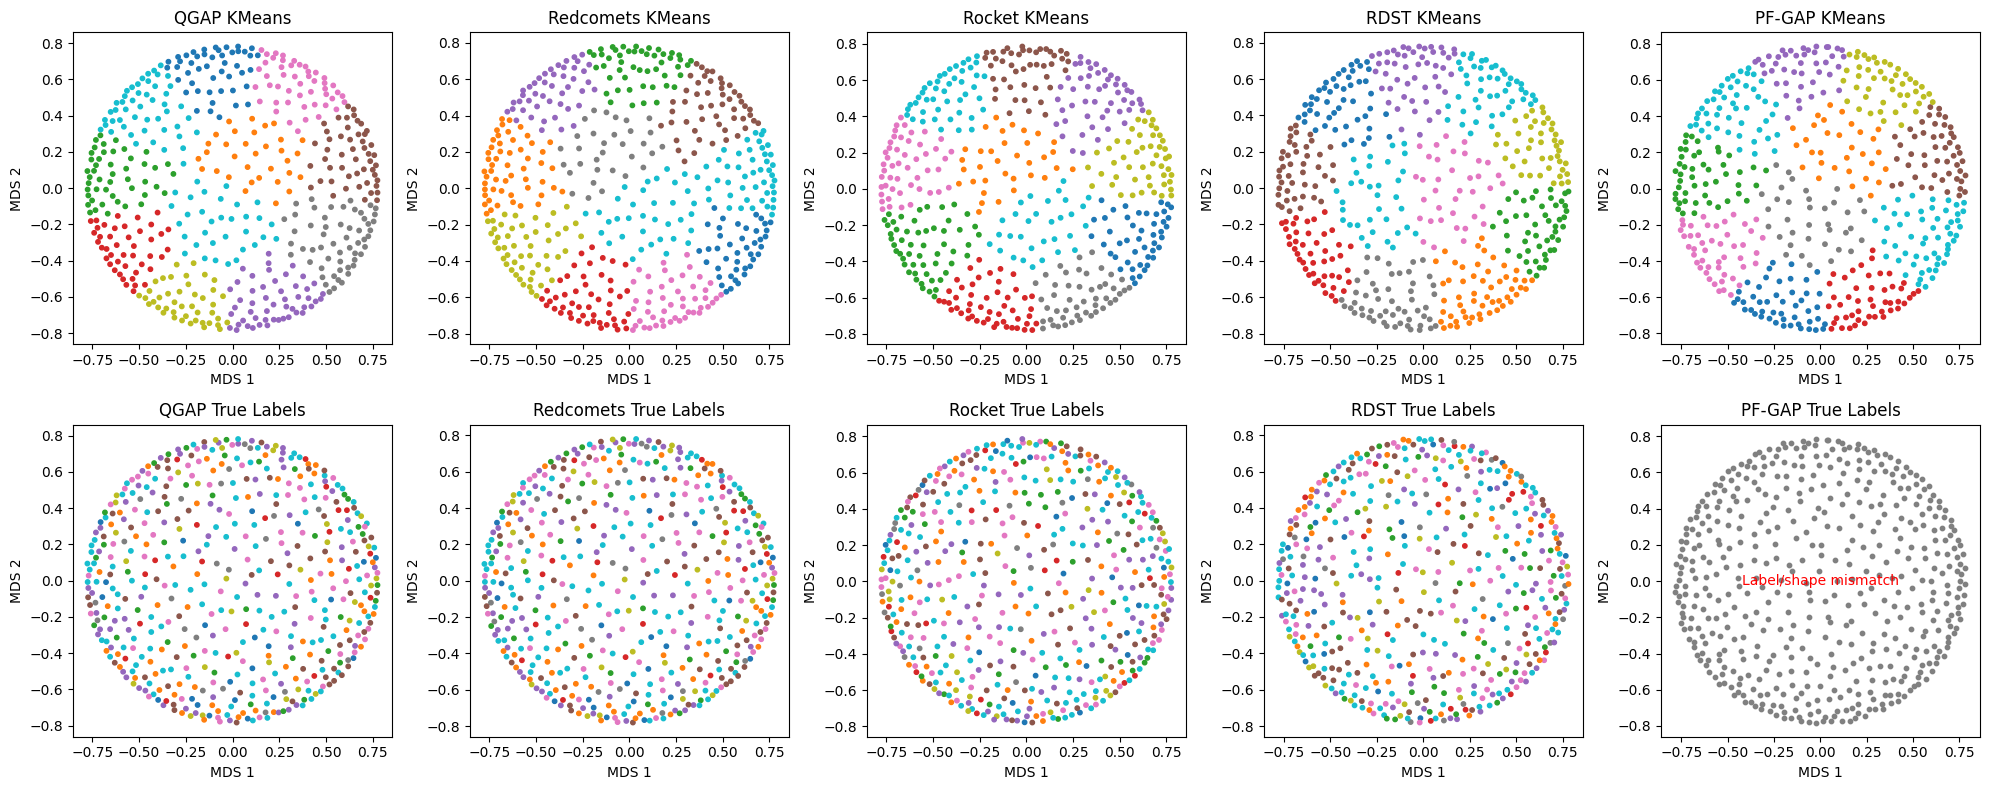

In [ ]:
from sklearn.cluster import KMeans

mds_vars = {
    "QGAP": mds_quant,
    "Redcomets": mds_redcomets,
    "Rocket": mds_rocket,
    "RDST": mds_rdst,
    "PF-GAP": mds_pf
}

n_clusters = len(np.unique(labels[labels >= 0]))  # ignore -1 (missing)

fig, axes = plt.subplots(2, len(mds_vars), figsize=(20, 8), gridspec_kw={'height_ratios': [4, 4]})

for col, (name, mds_data) in enumerate(mds_vars.items()):
    # KMeans clustering plot (top row)
    ax = axes[0, col]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(mds_data)
    scatter = ax.scatter(mds_data[:, 0], mds_data[:, 1], c=clusters, cmap='tab10', s=10)
    ax.set_title(f"{name} KMeans")
    ax.set_xlabel("MDS 1")
    ax.set_ylabel("MDS 2")

    # True labels plot (bottom row)
    ax2 = axes[1, col]
    # Only plot points with valid labels
    if mds_data.shape[0] == labels.shape[0]:
        valid = labels >= 0
        ax2.scatter(mds_data[valid, 0], mds_data[valid, 1], c=labels[valid], cmap='tab10', s=10)
    else:
        # If shape mismatch, plot all points in gray and show a warning
        ax2.scatter(mds_data[:, 0], mds_data[:, 1], color='gray', s=10)
        ax2.text(0.5, 0.5, "Label/shape mismatch", transform=ax2.transAxes, ha='center', va='center', color='red')
    ax2.set_title(f"{name} True Labels")
    ax2.set_xlabel("MDS 1")
    ax2.set_ylabel("MDS 2")

plt.tight_layout()
plt.show()

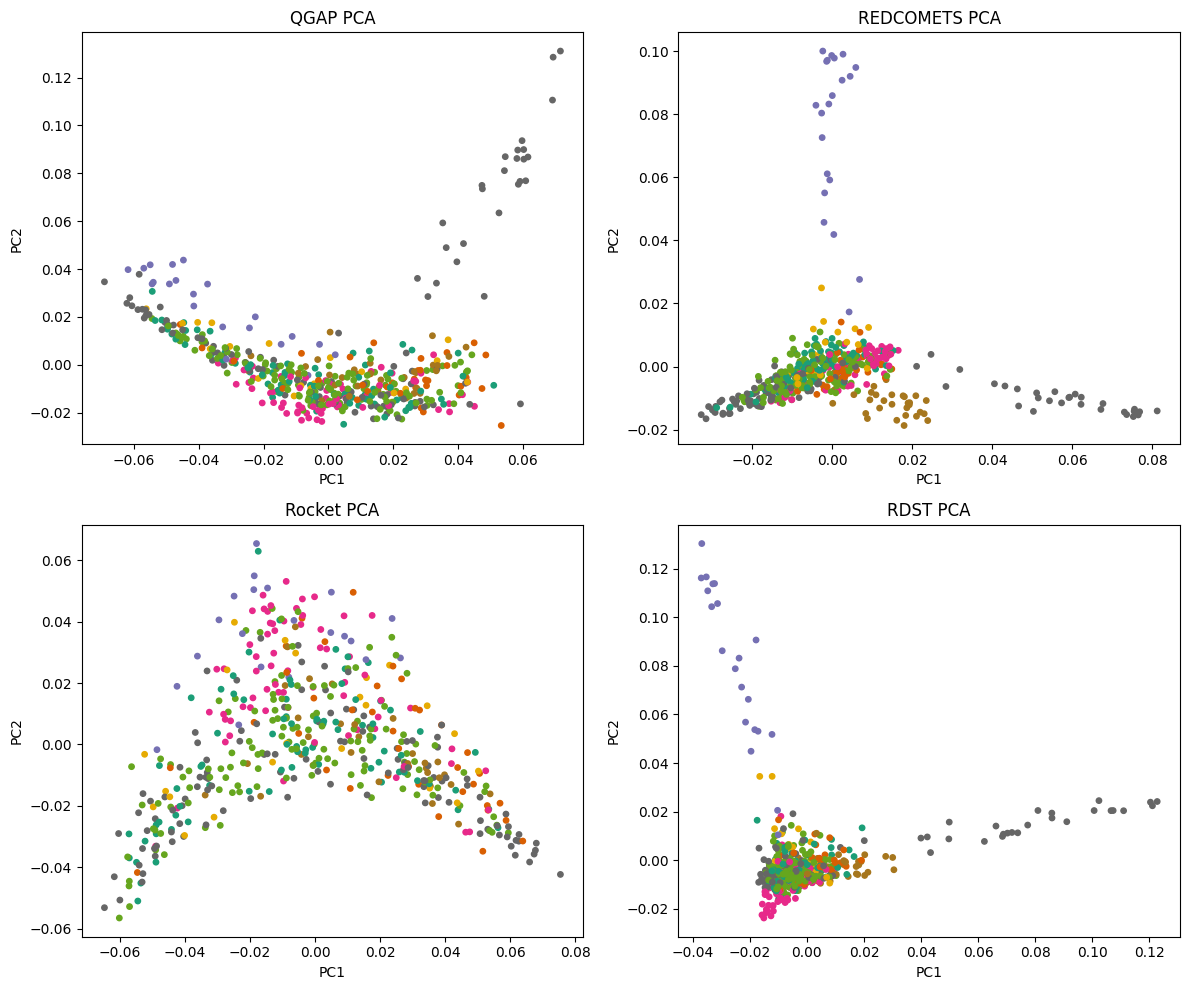

In [ ]:
from sklearn.decomposition import PCA

def plot_pca_in_grid(matrices, titles):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    for ax, matrix, title in zip(axes.flat, matrices, titles):
        pca = PCA(n_components=2)
        reduced = pca.fit_transform(matrix)
        ax.scatter(reduced[:, 0], reduced[:, 1], c=labels.astype(int), cmap='Dark2', s=15)
        ax.set_title(title)
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
    plt.tight_layout()
    plt.show()

matrices = [quant_prox, redcomets_prox, rocket_prox, rdst_prox]
titles = ["QGAP PCA", "REDCOMETS PCA", "Rocket PCA", "RDST PCA"]

plot_pca_in_grid(matrices, titles)

# Determining Feature importance
-> Did the static features turn out important at all?

Time series Features range O to 1644
Static Features range 1644 to 1655


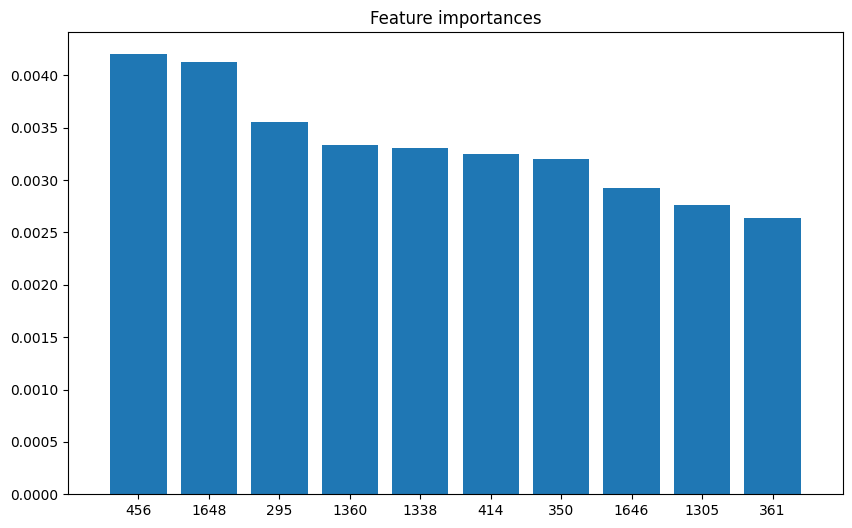

In [ ]:
from QGAP.qgap import QGAP
qgap = QGAP(matrix_type="dense")

qgap.fit(time_series, labels, static = static2024)

# Retrieve feature importances:
importances = qgap._estimator.feature_importances_
# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

print(f"Time series Features range O to {len(importances) - 11}")
print(f"Static Features range {len(importances) - 11} to {len(importances)}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.show()


In [ ]:
static2024.shape, importances.shape

((501, 11), (1655,))

In [ ]:
# Extract and print feature importances for static variables
static_feature_importances = importances[-11:]  # Last 11 features correspond to static variables
static_feature_names = static2024.columns.tolist()

print("Feature Importances for Static Variables:")
for name, importance in zip(static_feature_names, static_feature_importances):
    print(f"{name}: {importance:.4f}")

Feature Importances for Static Variables:
PE Ratio: 0.0009
PB Ratio: 0.0007
PS Ratio: 0.0029
ROE: 0.0005
ROA: 0.0041
Debt/Equity: 0.0012
Current Ratio: 0.0015
Profit Margin: 0.0007
Revenue Growth YoY: 0.0004
EPS Growth Next 5Y: 0.0002
Market Cap: 0.0004


Time series Features range O to 30000
Static Features range 30000 to 30011
Feature Importances for Static Variables:
PE Ratio: 0.0000
PB Ratio: 0.0000
PS Ratio: 0.0003
ROE: 0.0000
ROA: 0.0009
Debt/Equity: 0.0001
Current Ratio: 0.0000
Profit Margin: 0.0000
Revenue Growth YoY: 0.0000
EPS Growth Next 5Y: 0.0000
Market Cap: 0.0000


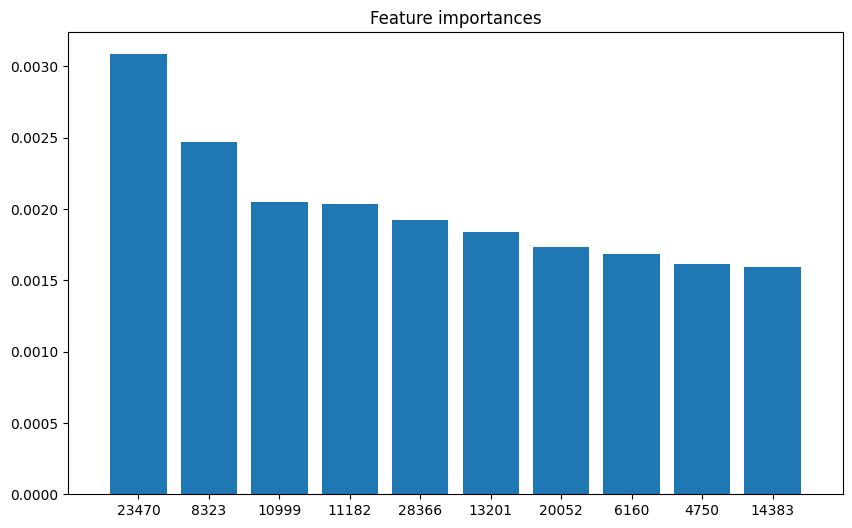

In [ ]:
### RDST Trials and Results ###

from RDST.rdst import RDST_GAP

rdst = RDST_GAP(save_transformed_data = True)

rdst.fit(time_series, labels, static = static2024)

# Retrieve feature importances:
importances = rdst._estimator.feature_importances_
# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Extract and print feature importances for static variables
static_feature_importances = importances[-11:]  # Last 11 features correspond to static variables
static_feature_names = static2024.columns.tolist()

print(f"Time series Features range O to {len(importances) - 11}")
print(f"Static Features range {len(importances) - 11} to {len(importances)}")

print("Feature Importances for Static Variables:")
for name, importance in zip(static_feature_names, static_feature_importances):
    print(f"{name}: {importance:.4f}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.show()

Time series Features range O to 4032
Static Features range 4032 to 8058
Feature Importances for Static Variables:
PE Ratio: 0.0001
PB Ratio: 0.0000
PS Ratio: 0.0000
ROE: 0.0000
ROA: 0.0003
Debt/Equity: 0.0000
Current Ratio: 0.0000
Profit Margin: 0.0000
Revenue Growth YoY: 0.0001
EPS Growth Next 5Y: 0.0000
Market Cap: 0.0002


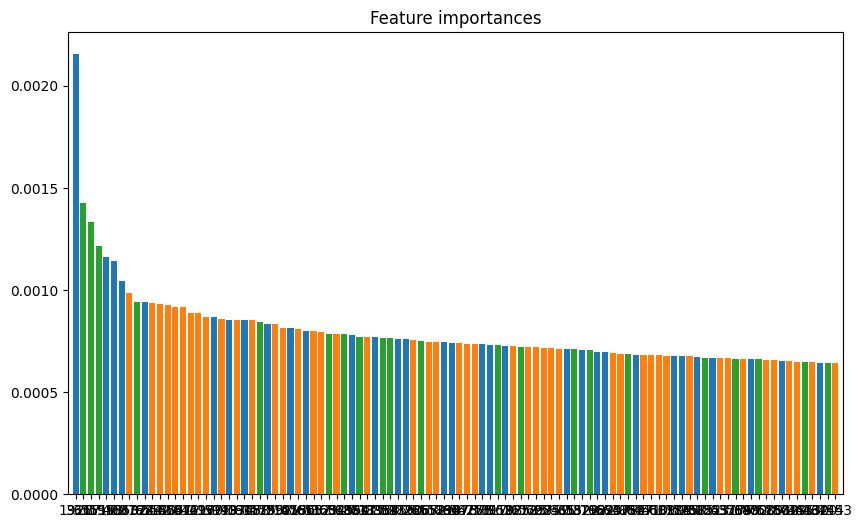

In [ ]:
### ROCKET Trials and Results ###

from RFGAP_Rocket.RFGAP_Rocket import RFGAP_Rocket

rf_rocket = RFGAP_Rocket(prediction_type = "classification", rocket = "Multi",
                         n_kernels=512)

rf_rocket.fit(time_series, labels, static = static2024, weights = 1) # THIS WEIGHTS STATIC as half important

# Retrieve feature importances:
importances = rf_rocket.rf_gap.feature_importances_
# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Extract and print feature importances for static variables
static_feature_importances = importances[-11:]  # Last 11 features correspond to static variables
static_feature_names = static2024.columns.tolist()

print(f"Time series Features range O to 4032")
print(f"Static Features range 4032 to {len(importances)}")

print("Feature Importances for Static Variables:")
for name, importance in zip(static_feature_names, static_feature_importances):
    print(f"{name}: {importance:.4f}")

# Create a color list: blue for time series, orange for static features
bar_colors = ['tab:blue' if idx <= 2016 else 'tab:green' if idx <= 4032 else 'tab:orange' for idx in indices[:100]]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(100), importances[indices[:100]], align="center", color=bar_colors)
plt.xticks(range(100), indices[:100])
plt.xlim([-1, 100])
plt.show()


# Test Accuracies
- Using RF Extend when applicable